In [3]:
import pandas as pd
import scipy as sc
import numpy as np

In [4]:
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [5]:
newland_train = pd.read_excel('Train.xlsx')
newland_test = pd.read_excel('Test.xlsx')

In [6]:
newland_train.head() 

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [7]:
newland_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [8]:
newland_test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0


In [9]:
newland_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              10100 non-null  int64 
 1   Name                    10100 non-null  object
 2   Birthday                10100 non-null  object
 3   Native Continent        10100 non-null  object
 4   Marital Status          10100 non-null  object
 5   Lives with              10100 non-null  object
 6   Base Area               10100 non-null  object
 7   Education Level         10100 non-null  object
 8   Years of Education      10100 non-null  int64 
 9   Employment Sector       10100 non-null  object
 10  Role                    10100 non-null  object
 11  Working Hours per week  10100 non-null  int64 
 12  Money Received          10100 non-null  int64 
 13  Ticket Price            10100 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [10]:
newland_train.describe(include = 'all')

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Evan Welch,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


In [11]:
from datetime import datetime
import calendar

In [12]:
#Created the variable age
newland_train["Birth_year"] = newland_train["Birthday"].str.split(',', expand=True)[1]
newland_train["Birth_year"] = newland_train["Birth_year"].astype(int)
newland_train["Age"] = 2046 - newland_train["Birth_year"]

In [13]:
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'A'
newland_train.loc[(newland_train['Money Received'] > 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'B'
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] > 0), 'Group'] = 'C'

In [14]:
newland_train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Birth_year,Age,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,2003,43,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,2006,40,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,2009,37,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,1985,61,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,2015,31,A


In [15]:
#Removed 4 columns
newland_train.drop(columns=['Birthday', 'Name', 'Birth_year', 'Money Received','Ticket Price'], inplace=True)

In [16]:
newland_train.set_index('CITIZEN_ID', inplace=True)

In [26]:
cor_pearson= newland_train.corr()
cor_pearson

,Years of Education,Working Hours per week,Income,Age
Years of Education,1.000000,0.138516,0.333089,0.035241
Working Hours per week,0.138516,1.000000,0.219890,0.064900
Income,0.333089,0.219890,1.000000,0.233157
Age,0.035241,0.064900,0.233157,1.000000


In [18]:
cor_spearman = newland_train.corr(method ='spearman')
cor_spearman

,Years of Education,Working Hours per week,Income,Age
Years of Education,1.000000,0.159087,0.322377,0.053780
Working Hours per week,0.159087,1.000000,0.258562,0.139271
Income,0.322377,0.258562,1.000000,0.271294
Age,0.053780,0.139271,0.271294,1.000000


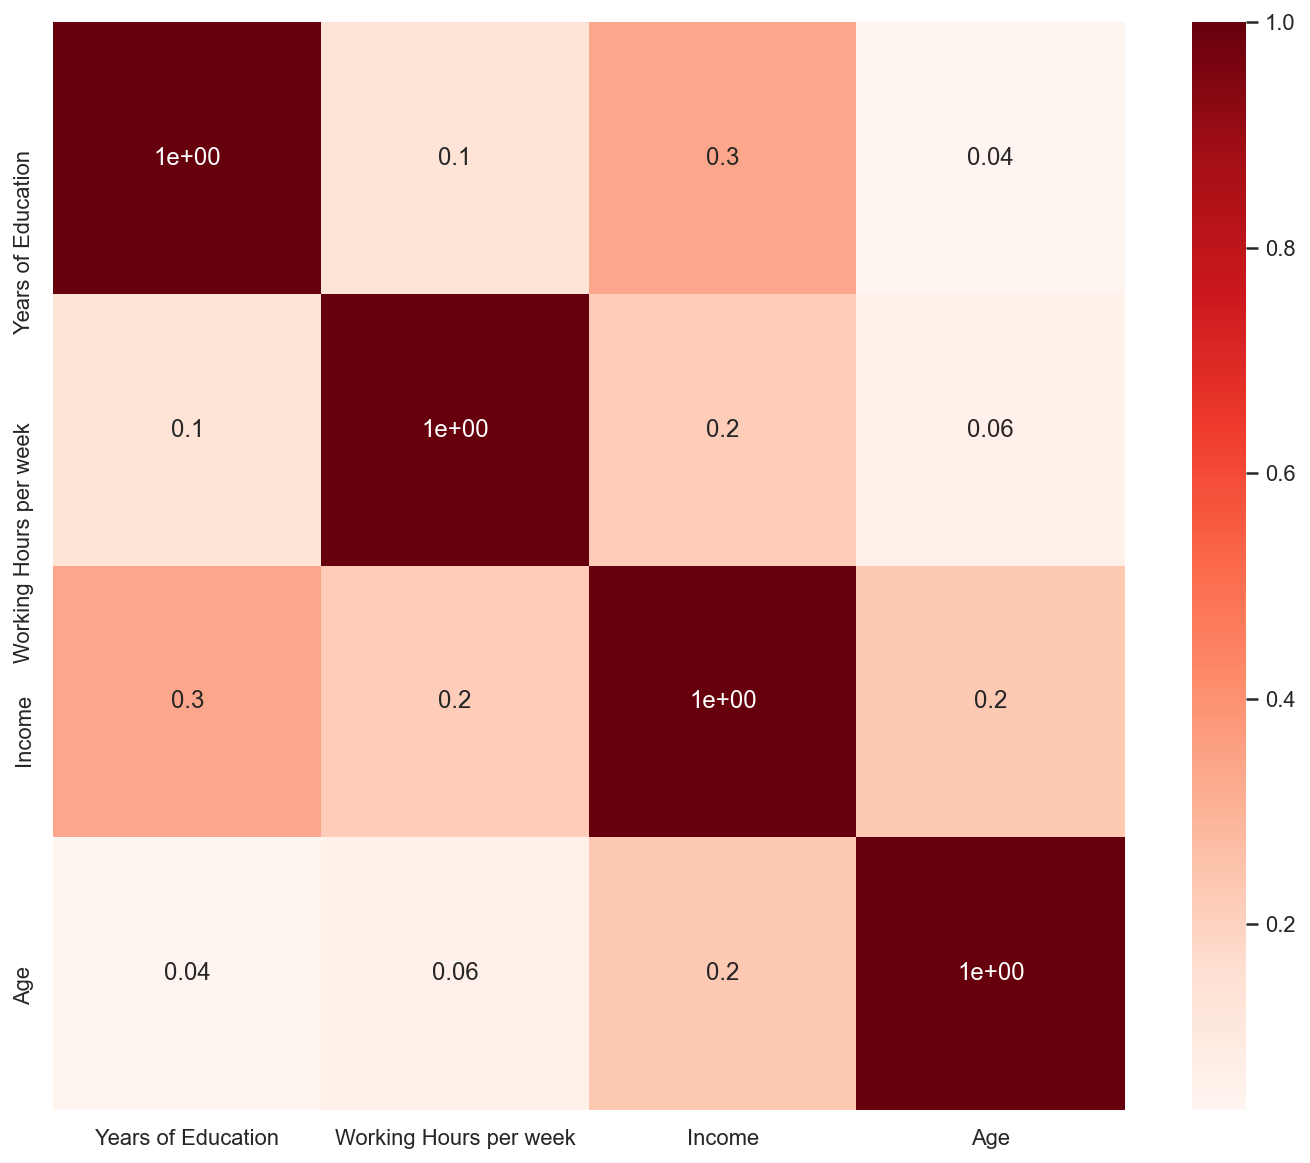

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data = cor_pearson, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

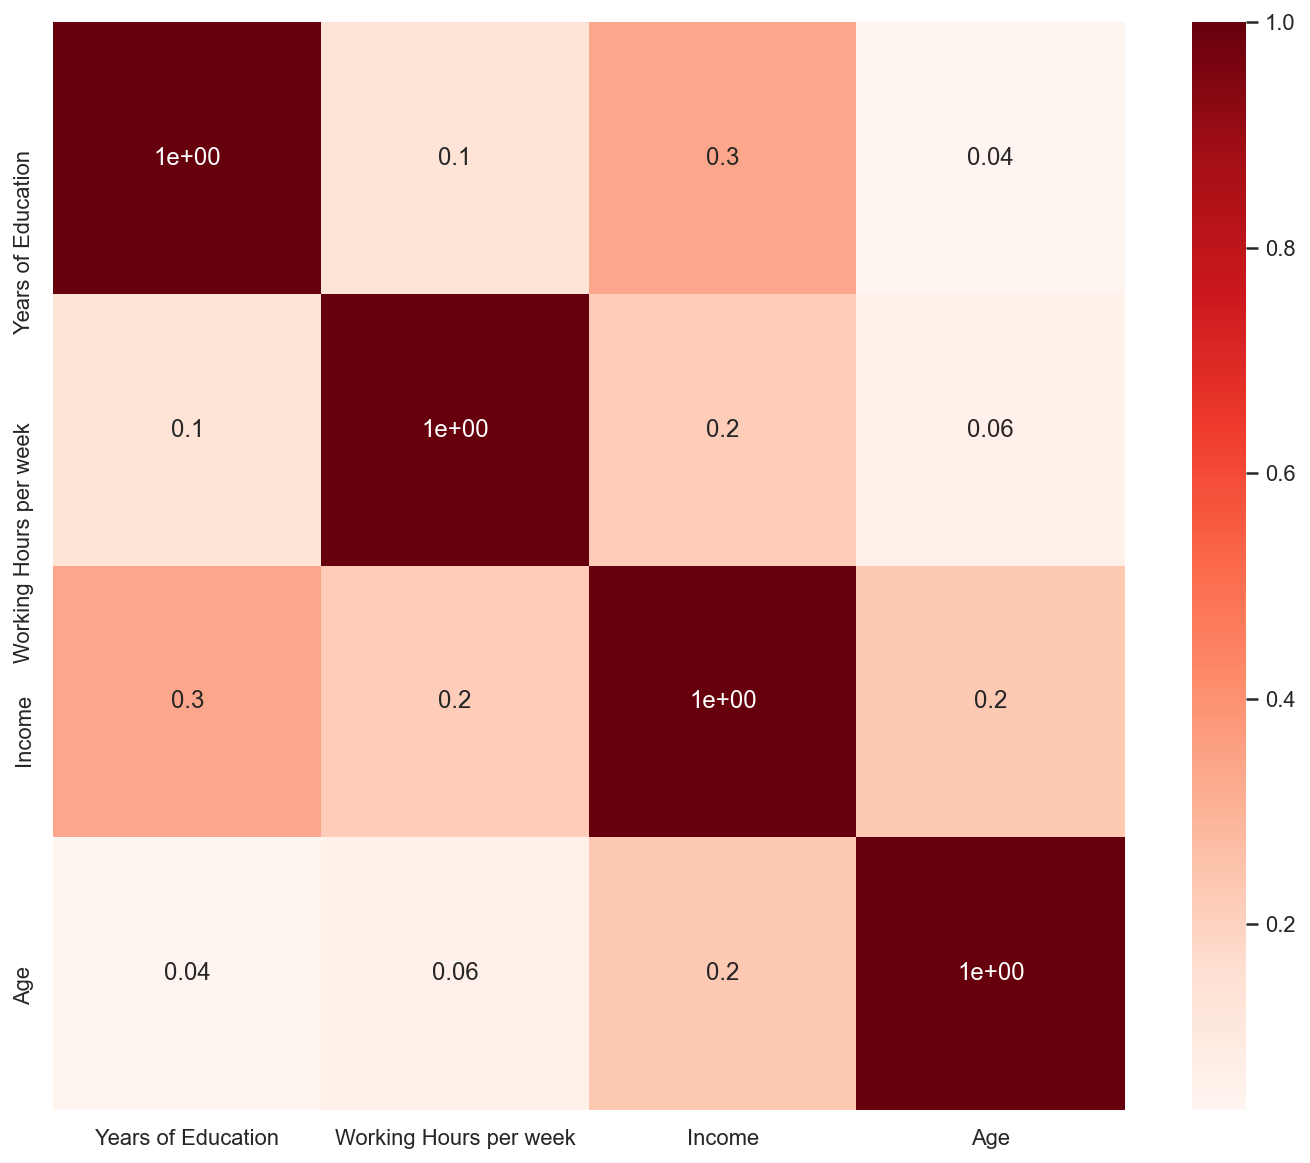

In [29]:

#Our numerical variables are independent
plt.figure(figsize=(12,10))
sns.heatmap(data = cor_spearman, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

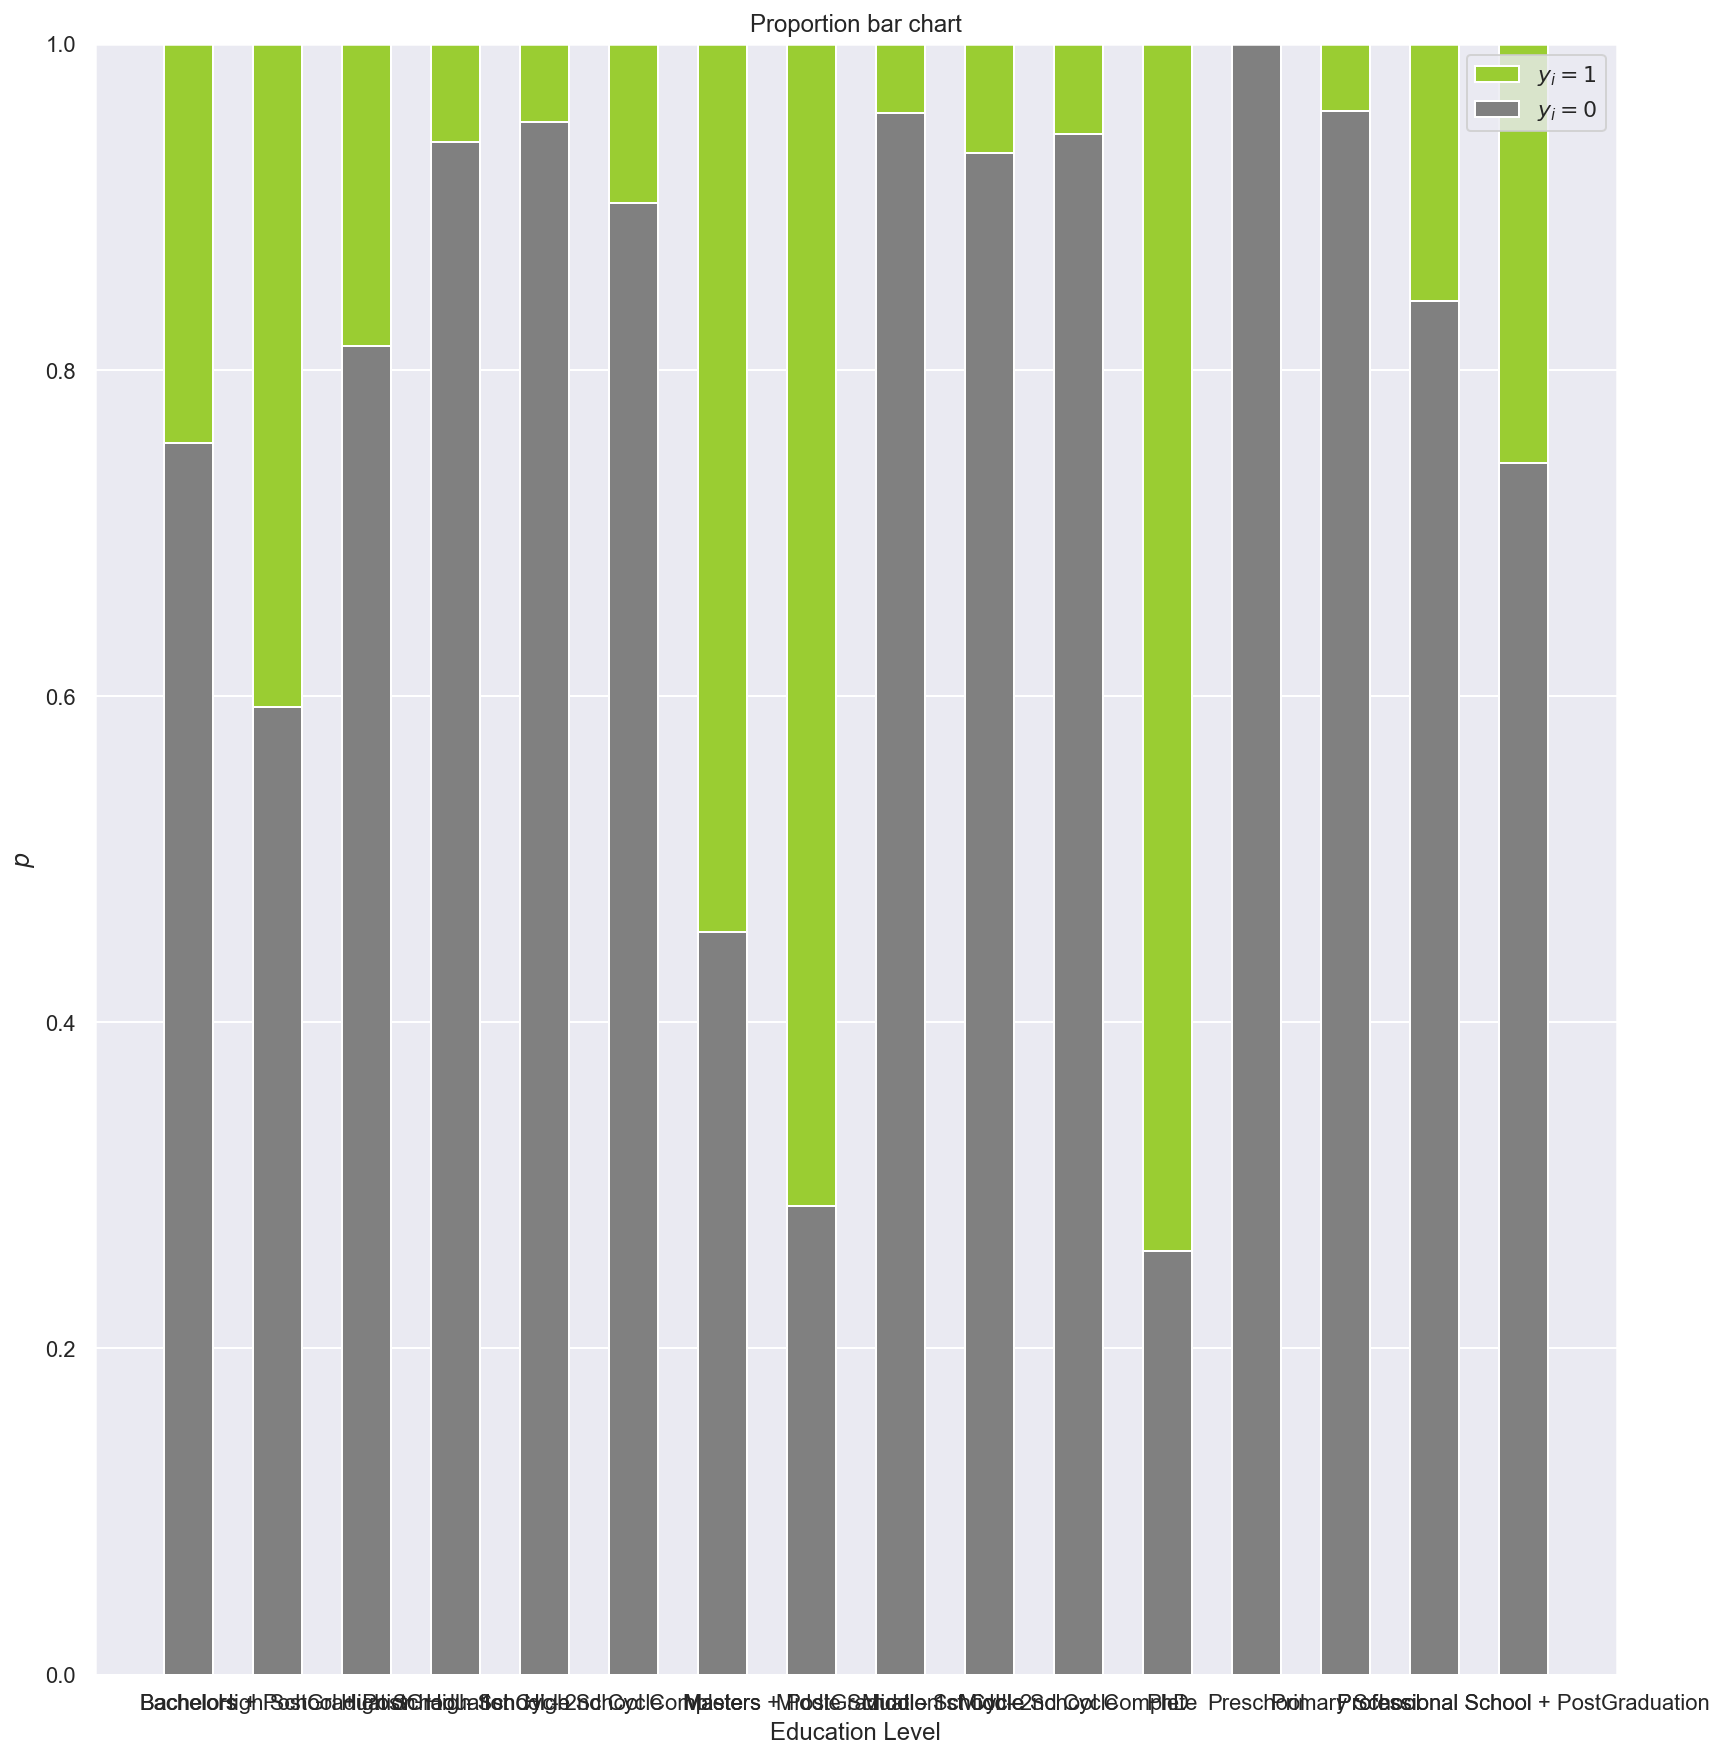

In [31]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Education Level", "Income")

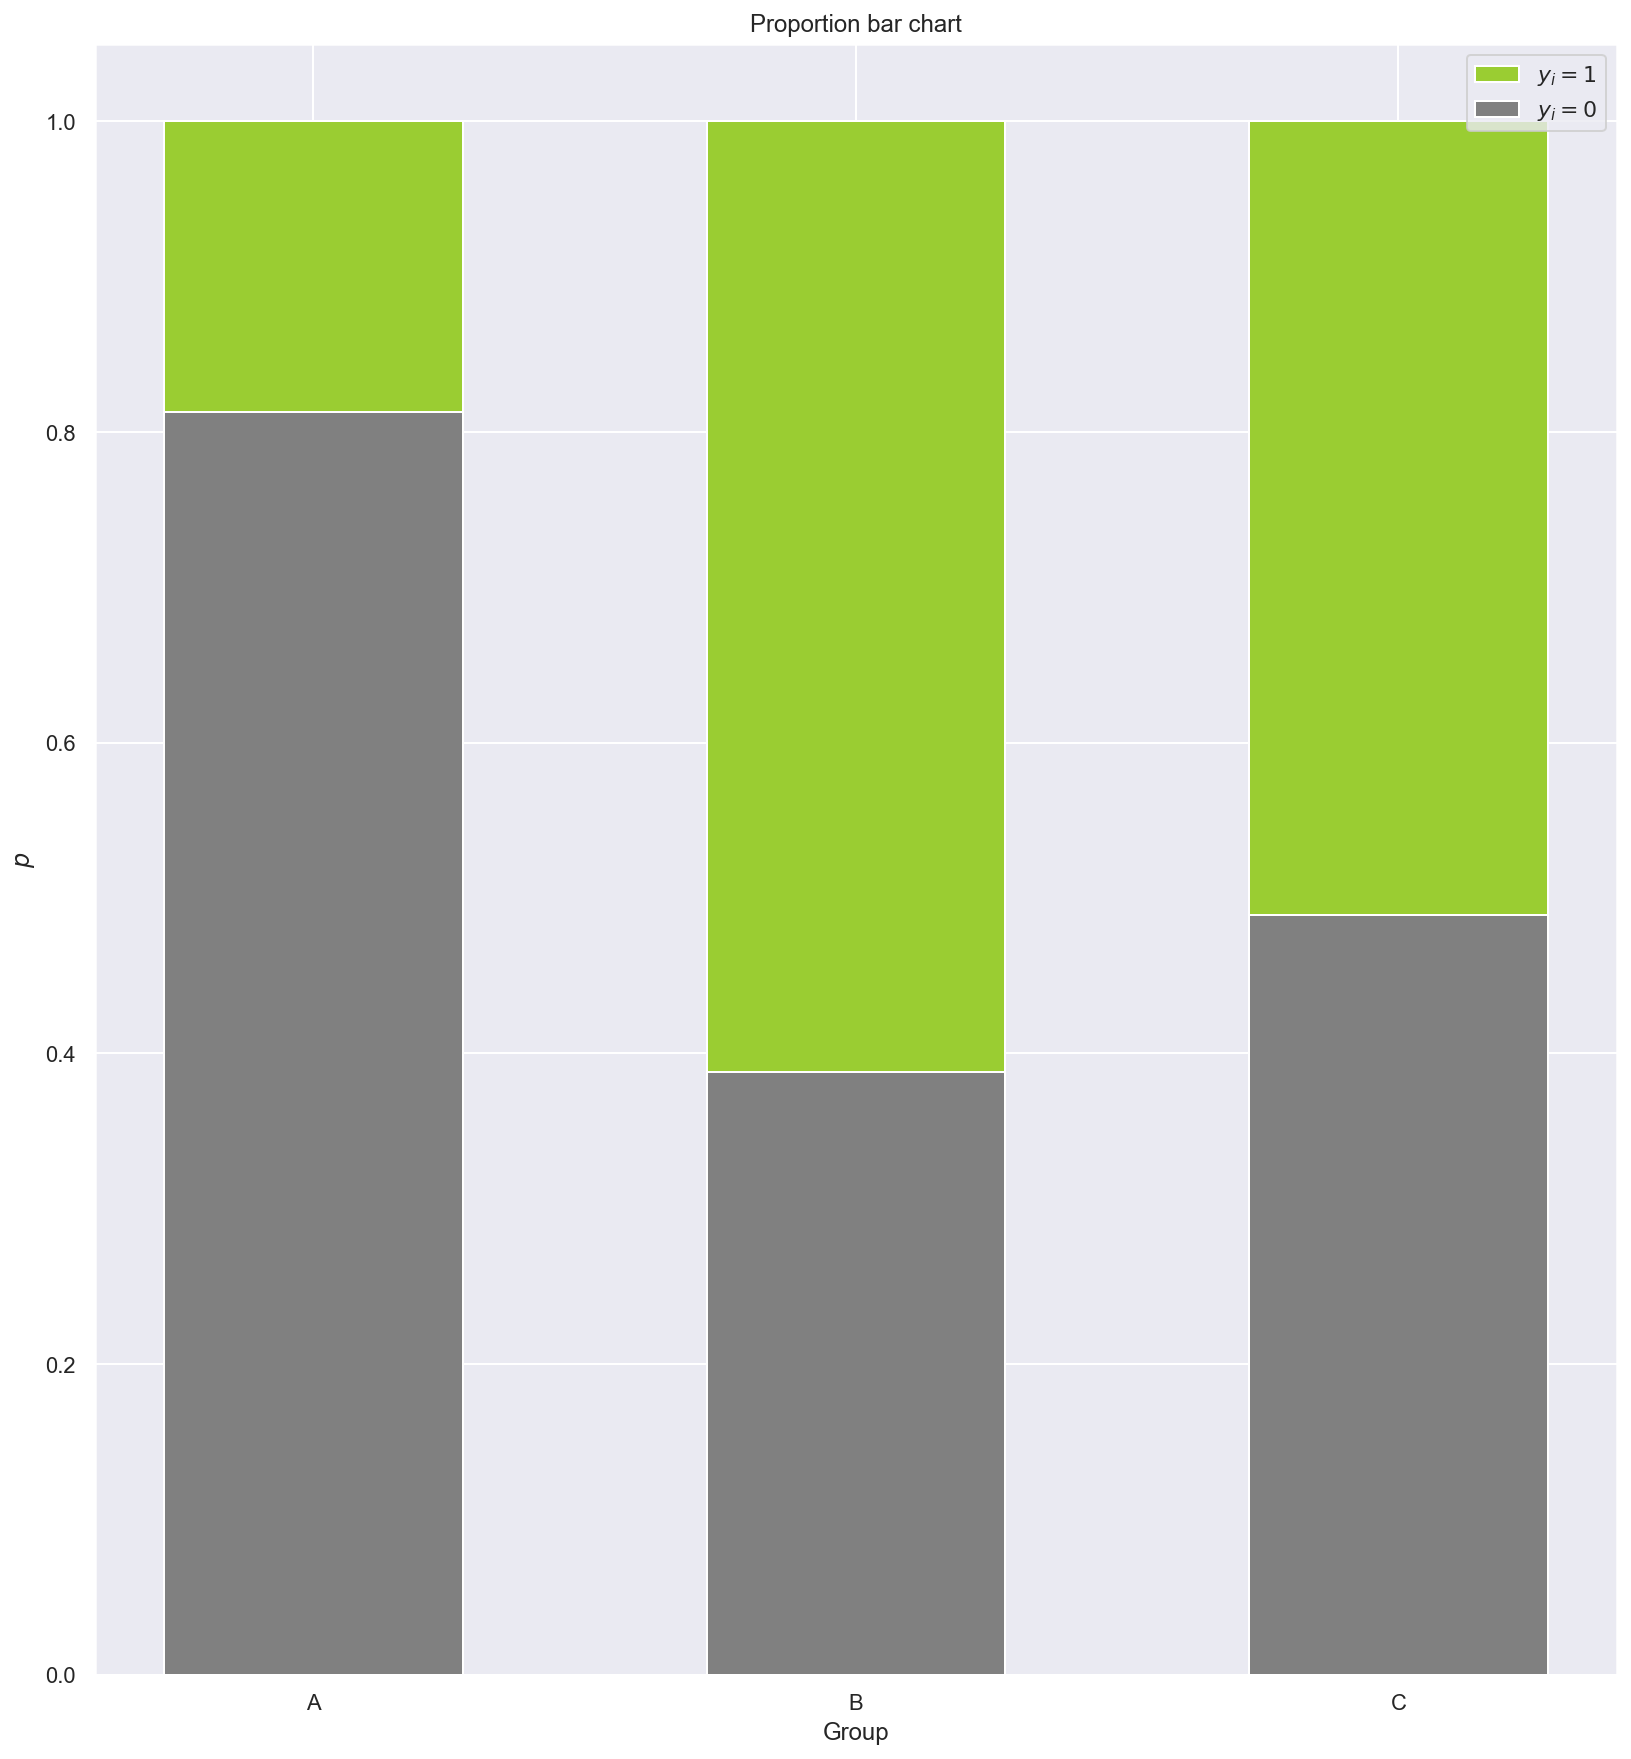

In [32]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Group", "Income")

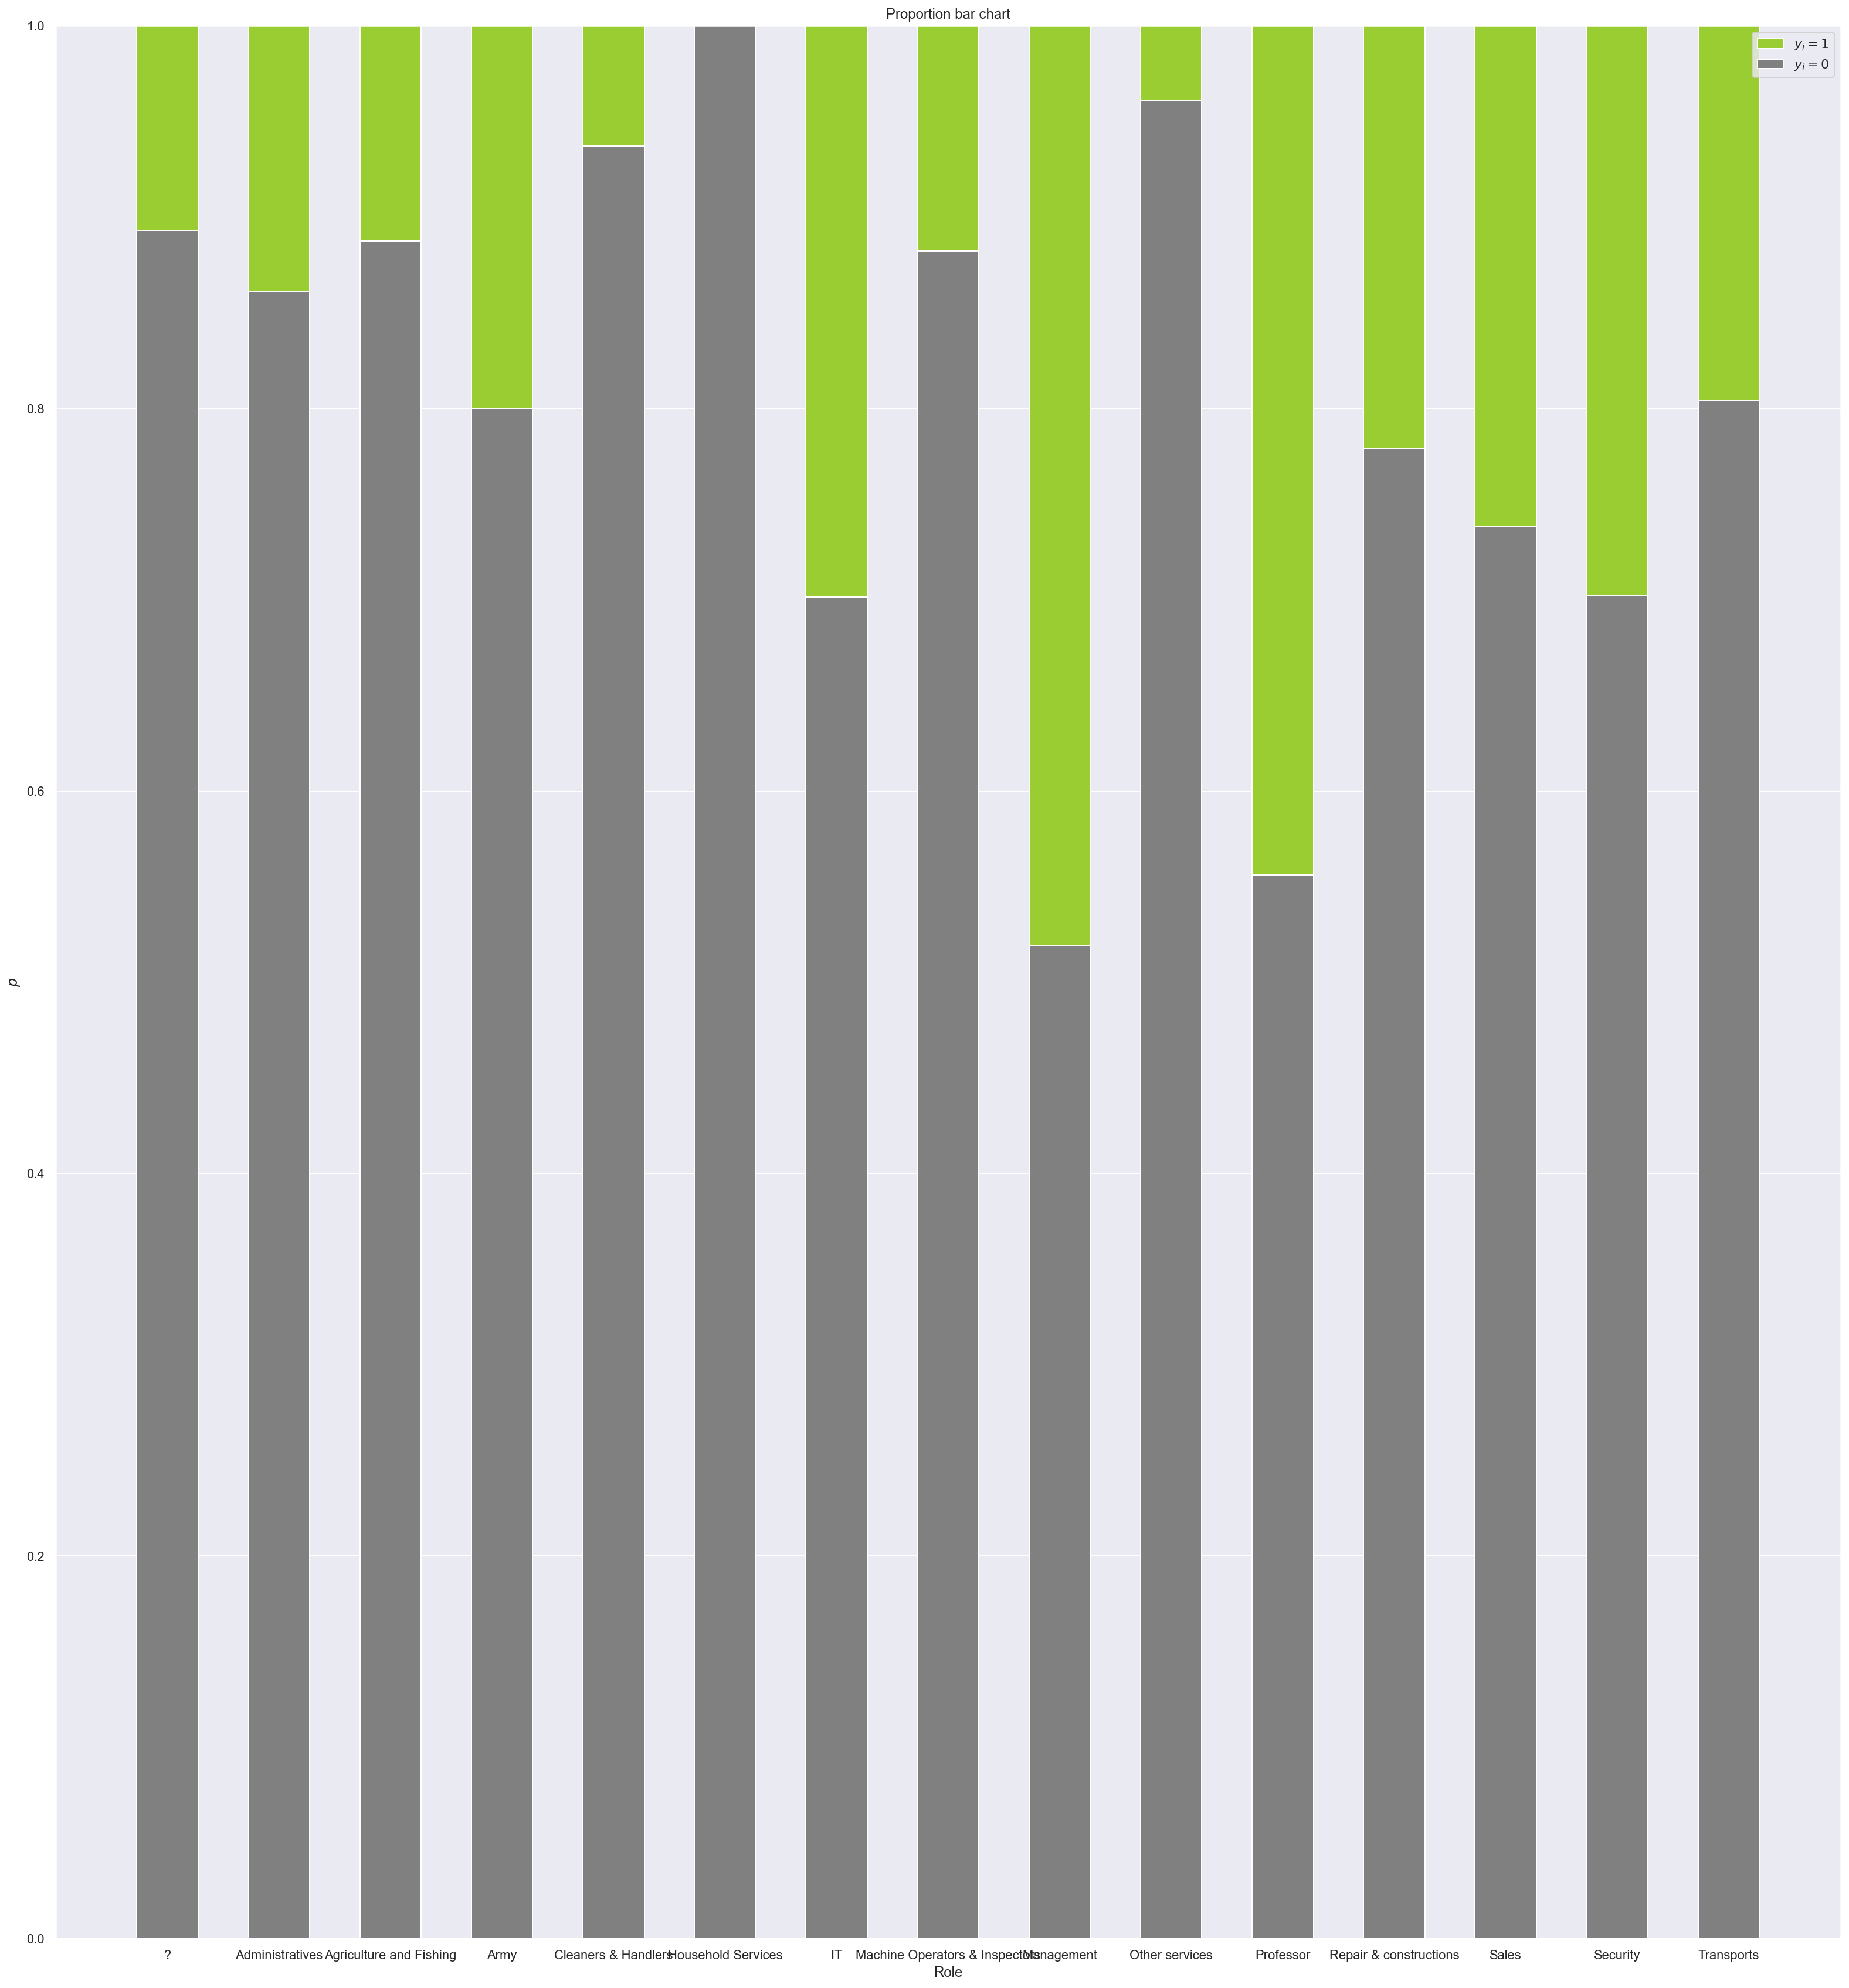

In [33]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(60, 30))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Role", "Income")

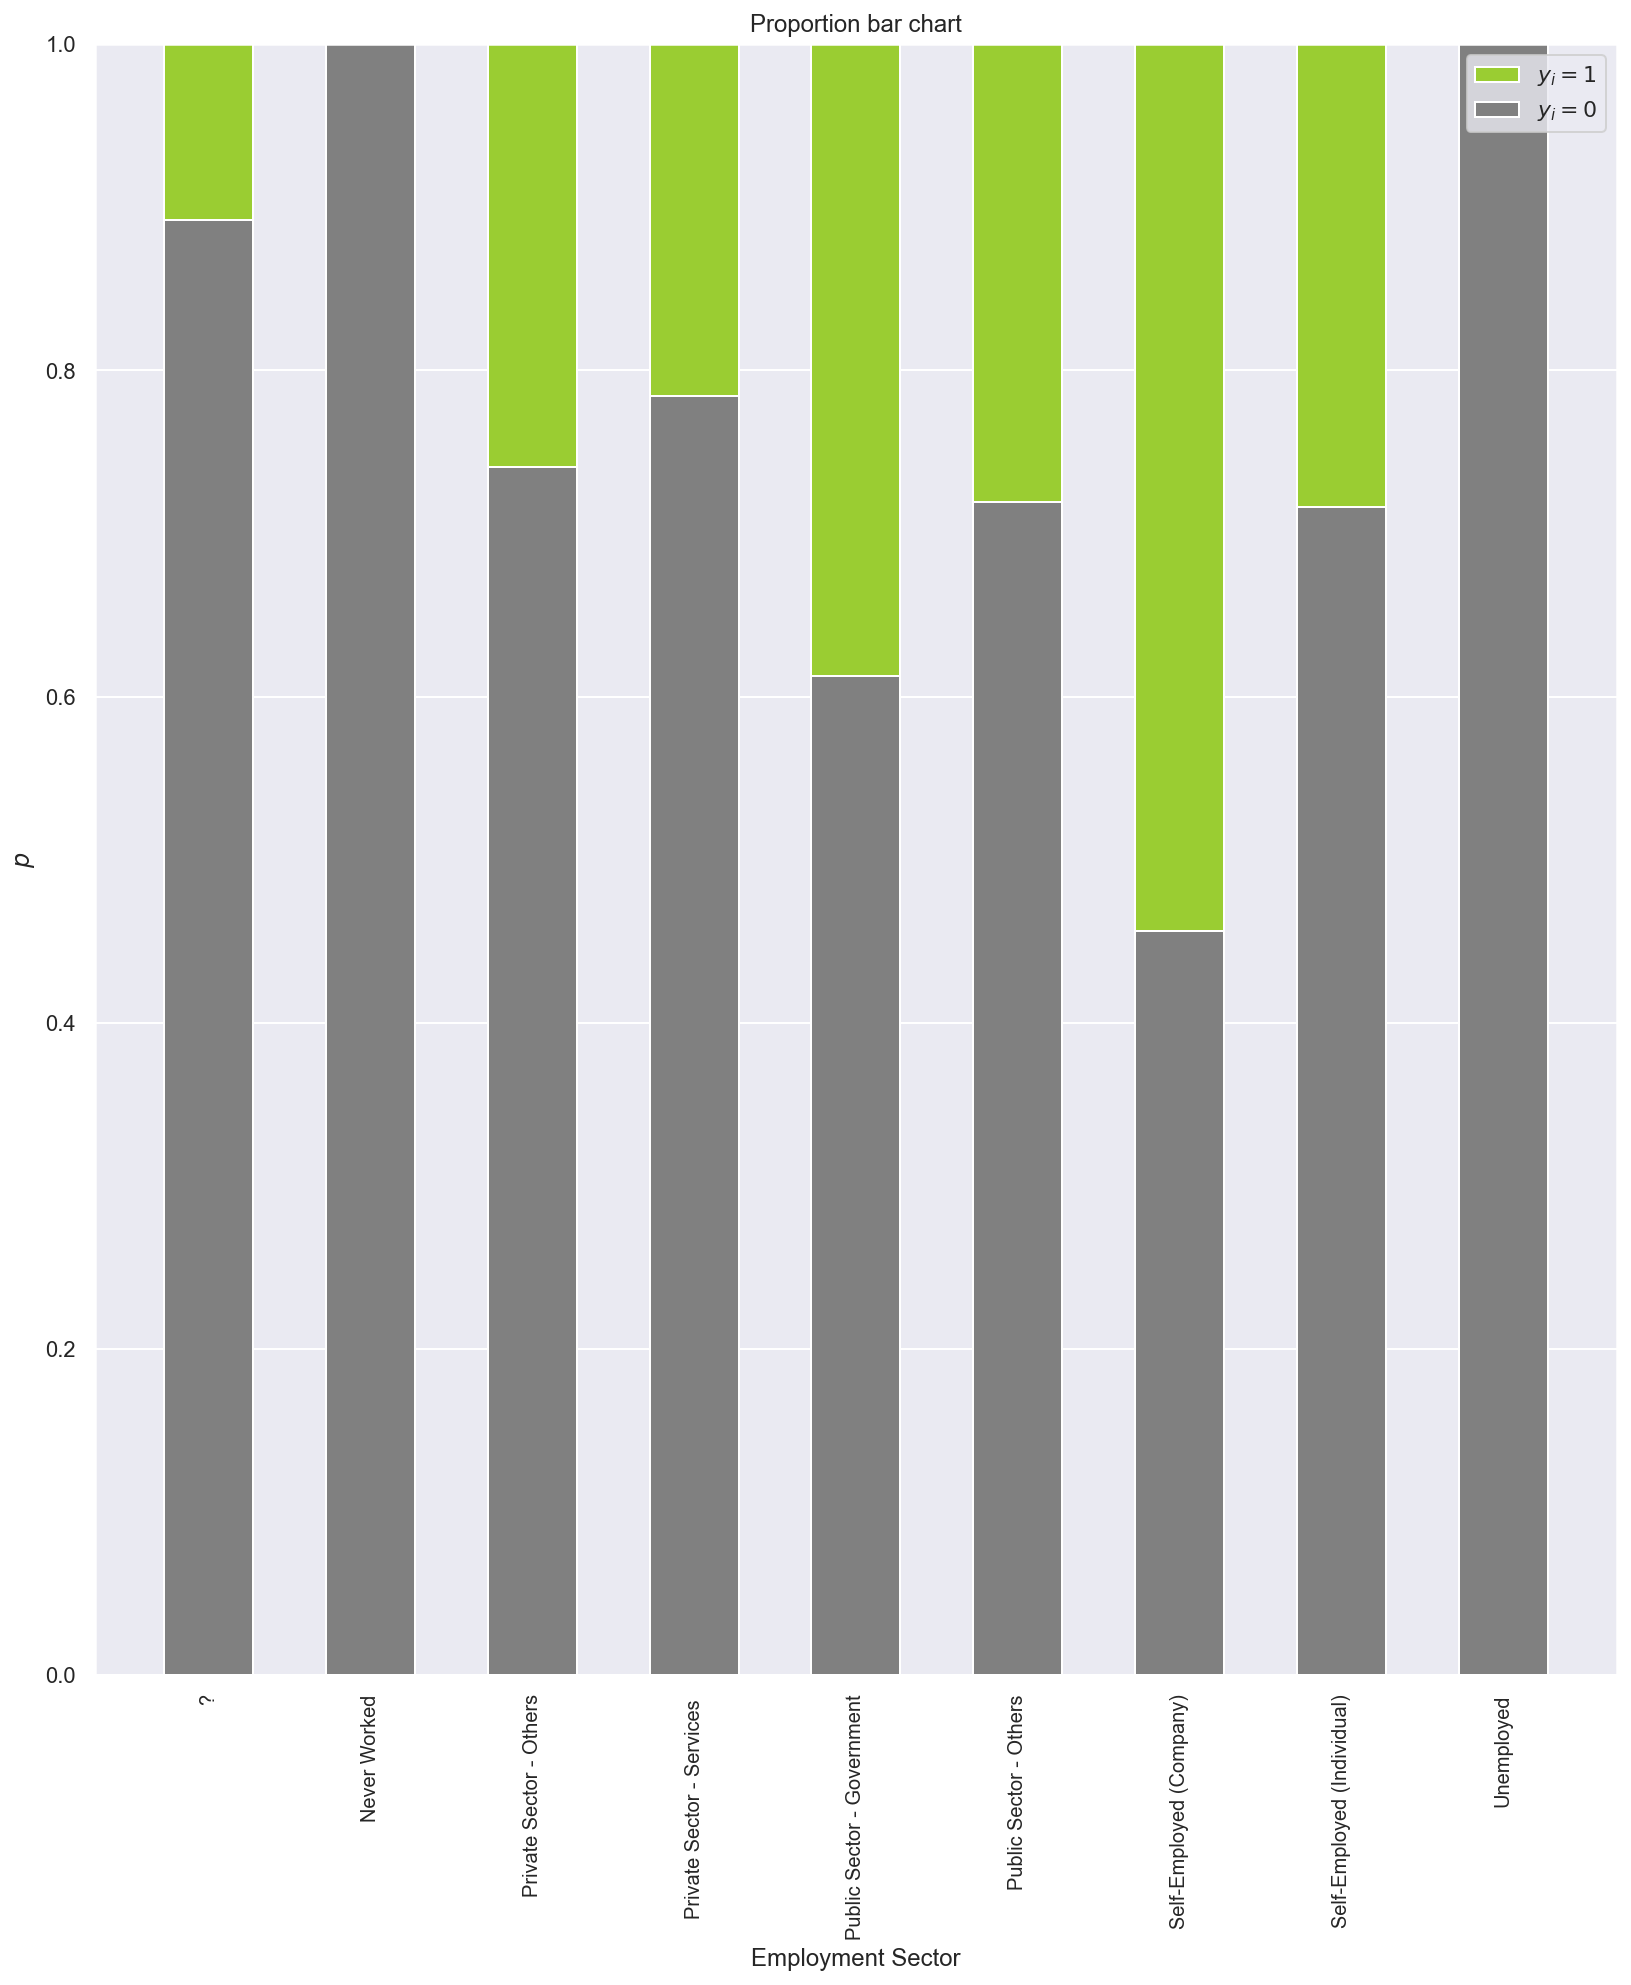

In [34]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Employment Sector", "Income")

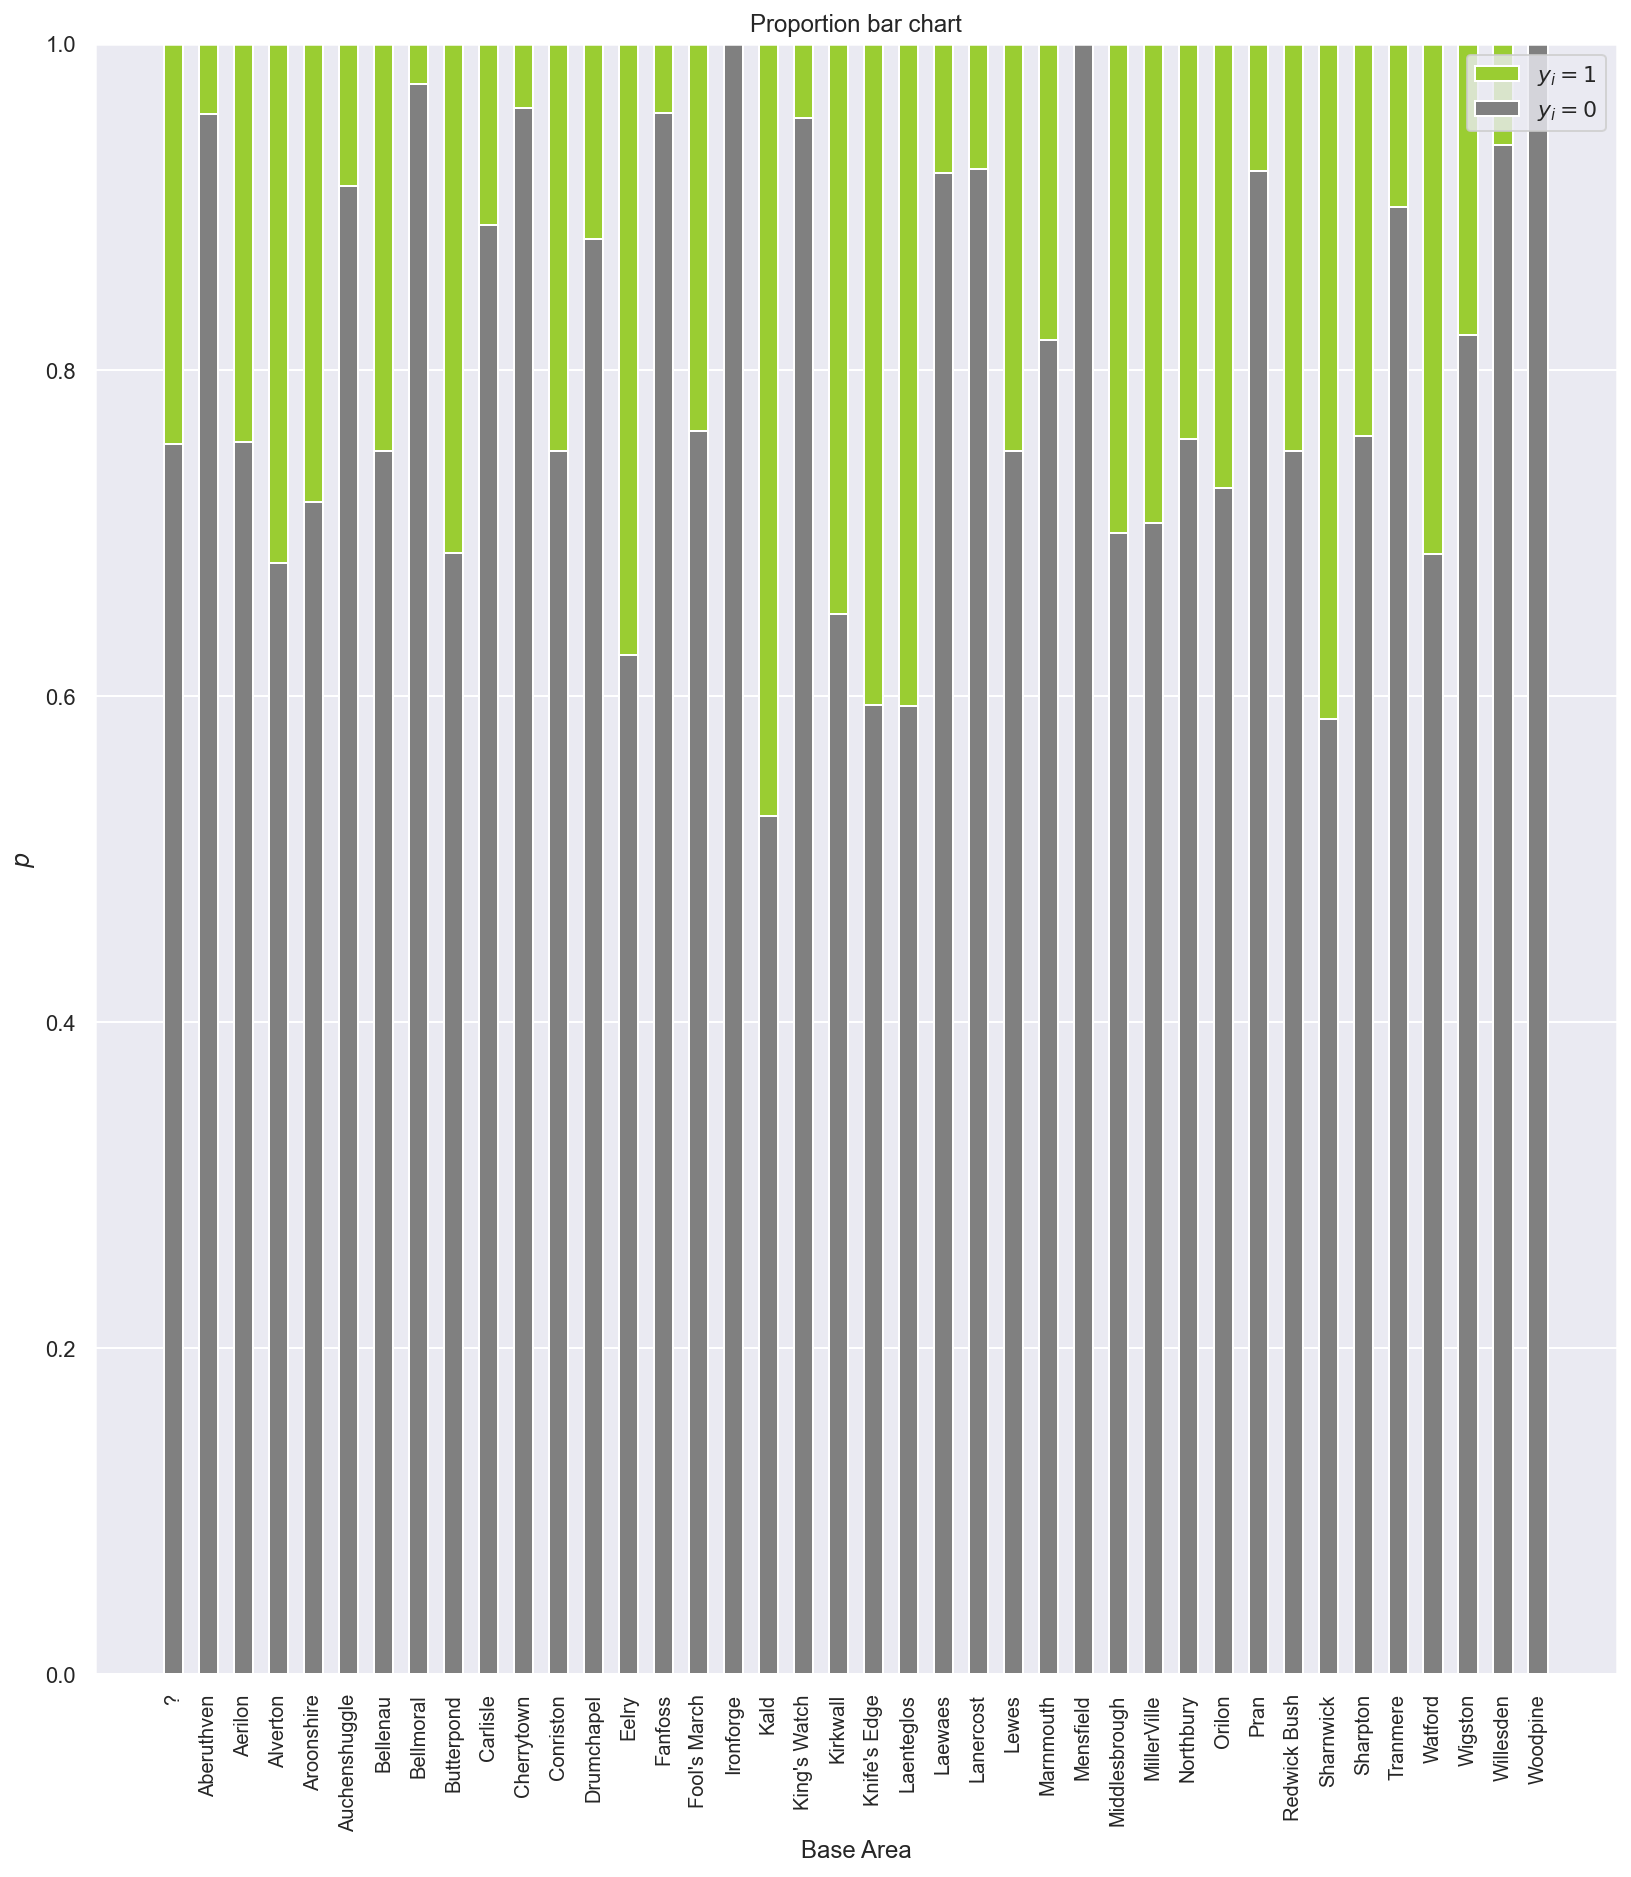

In [35]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Base Area", "Income")

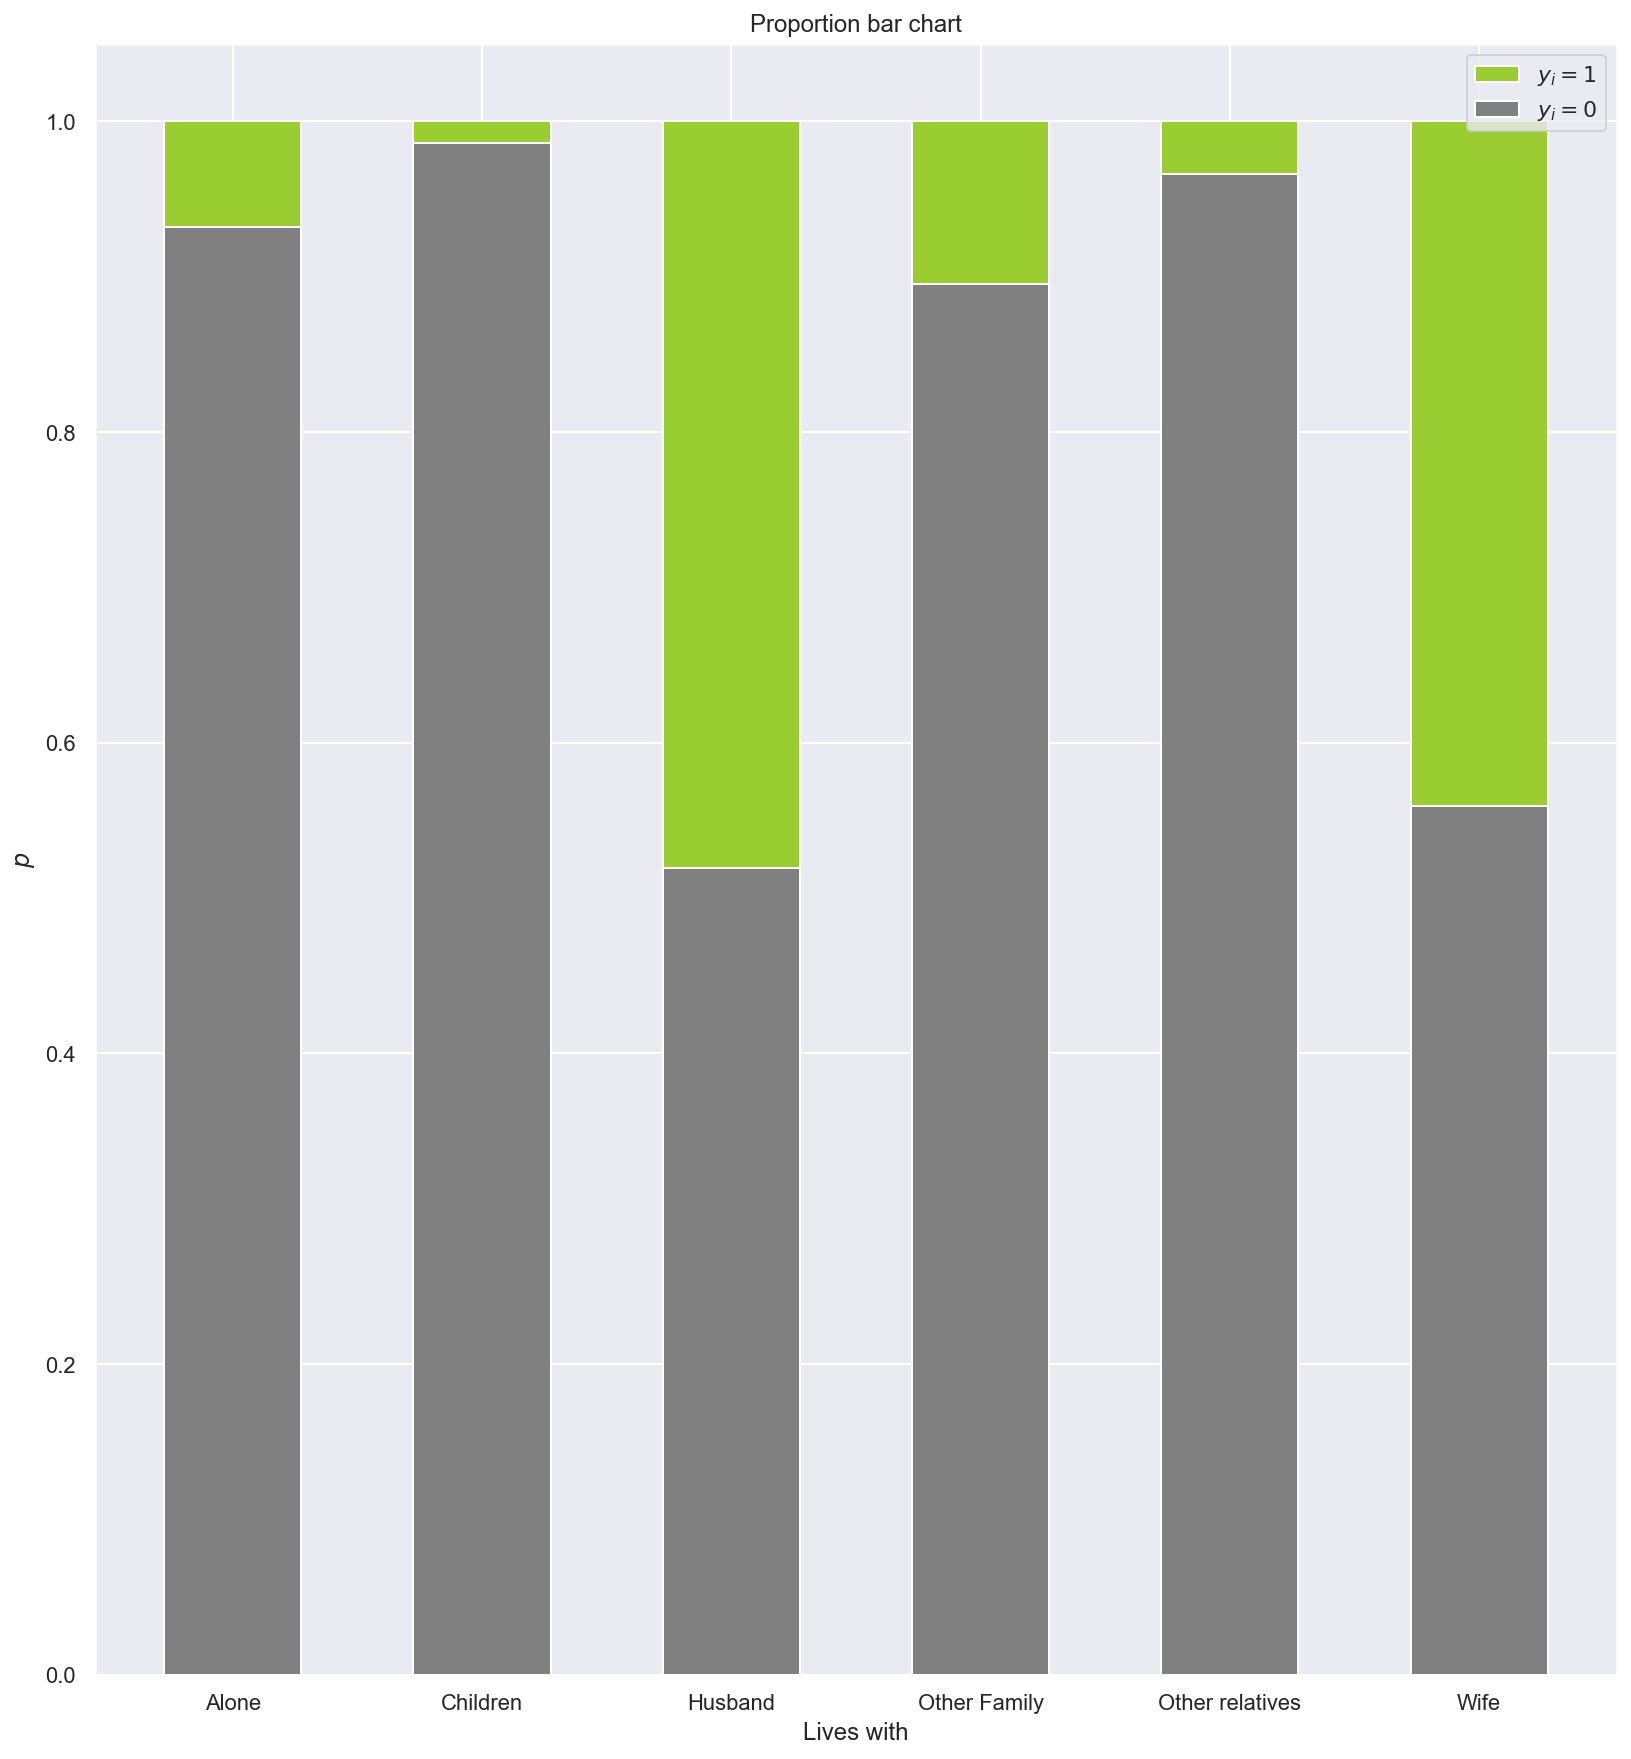

In [36]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Lives with", "Income")

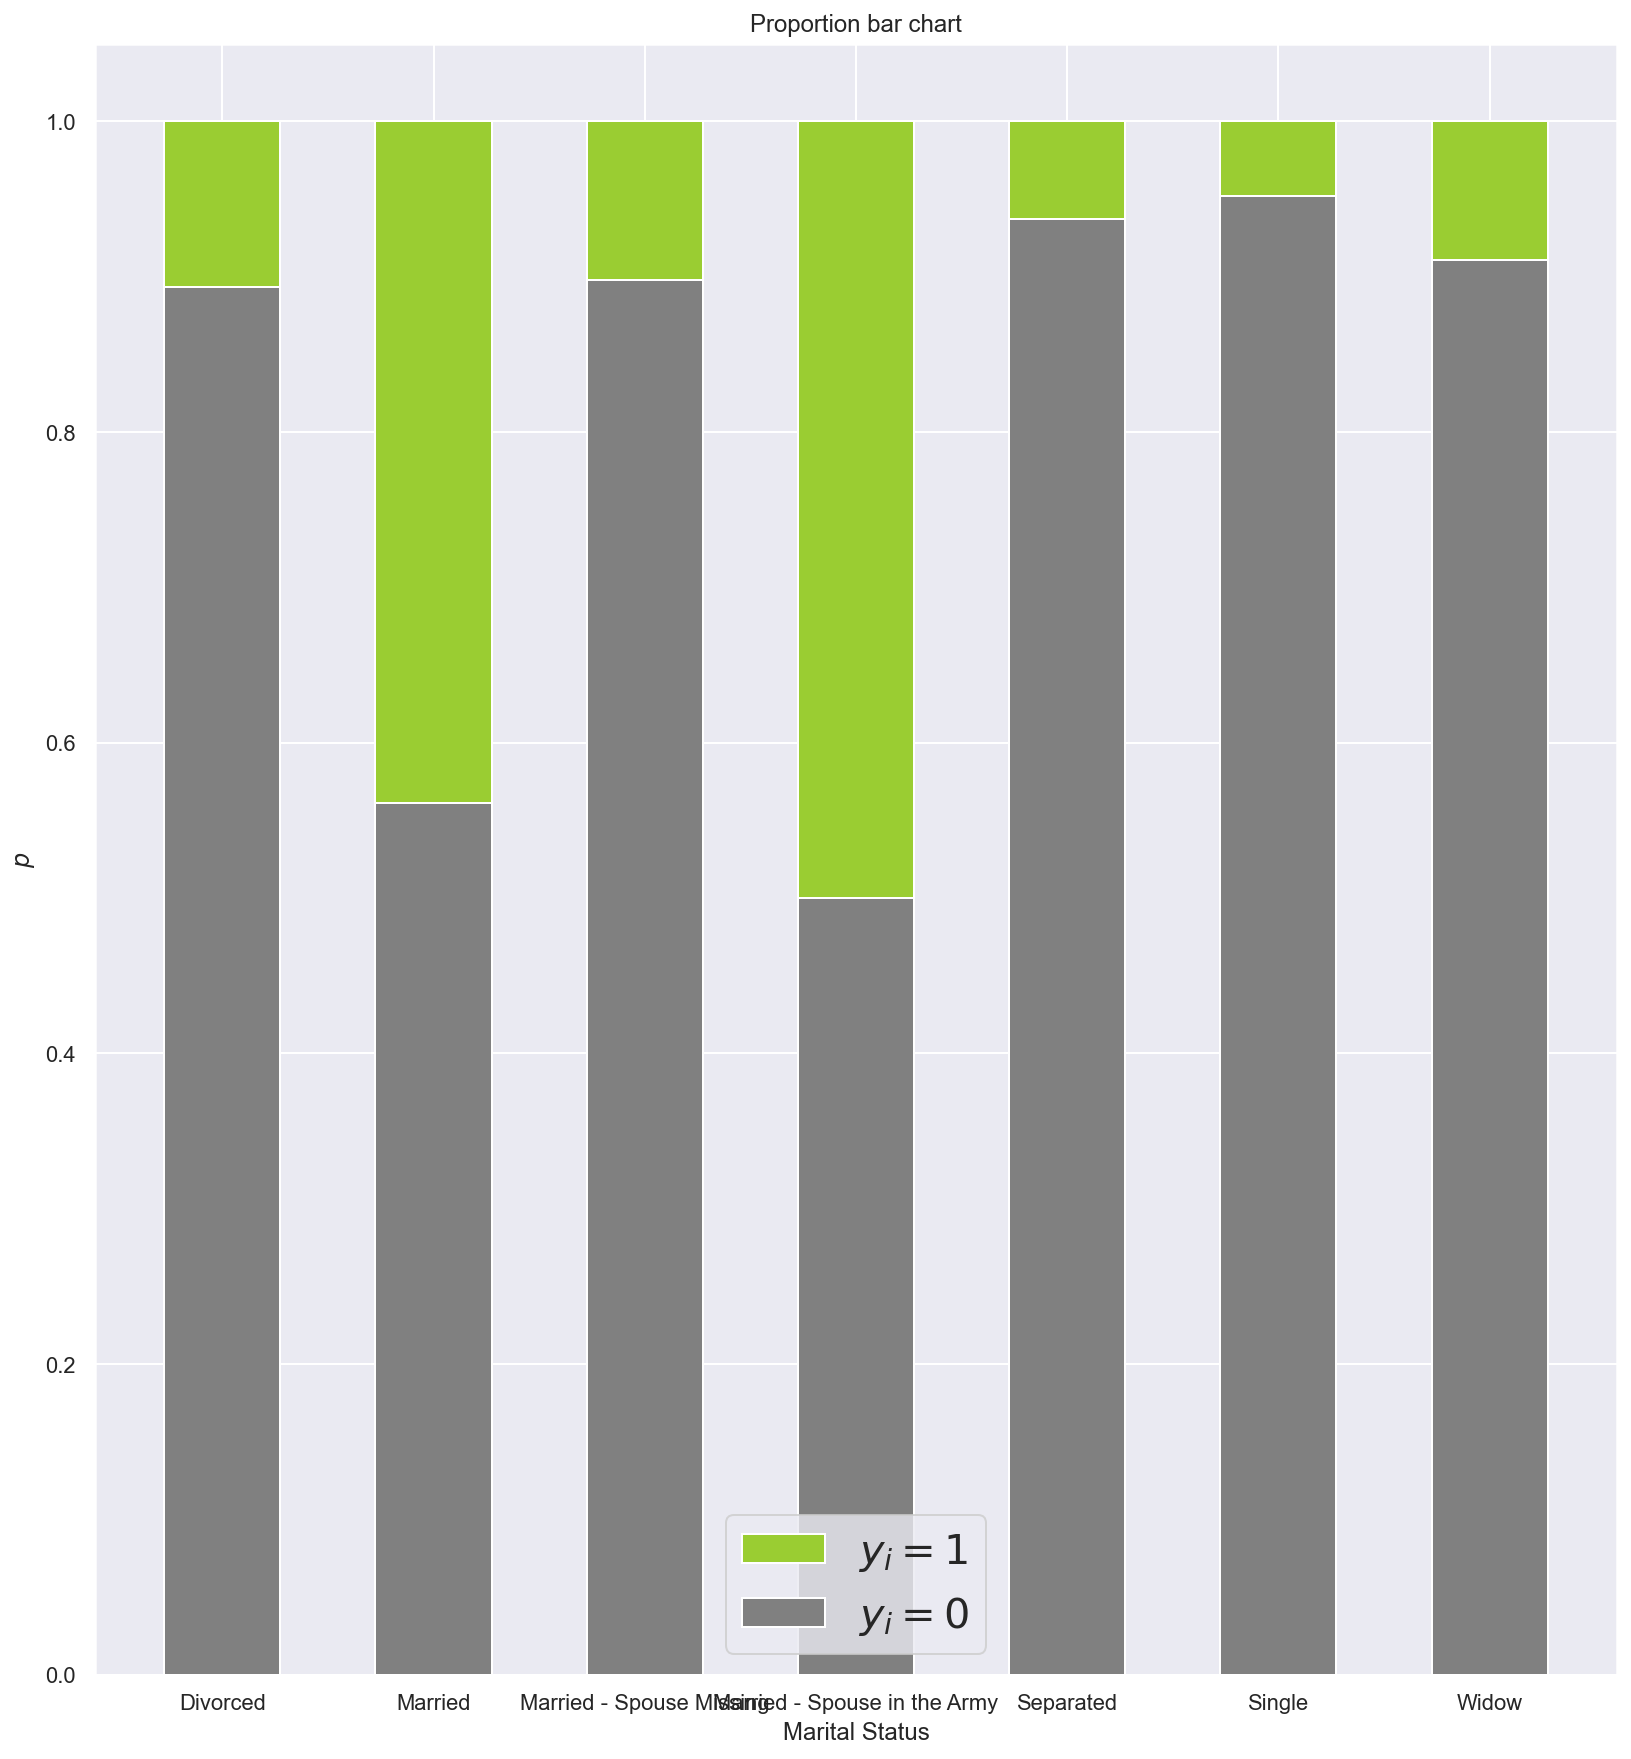

In [37]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),fontsize="xx-large")
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Marital Status", "Income")

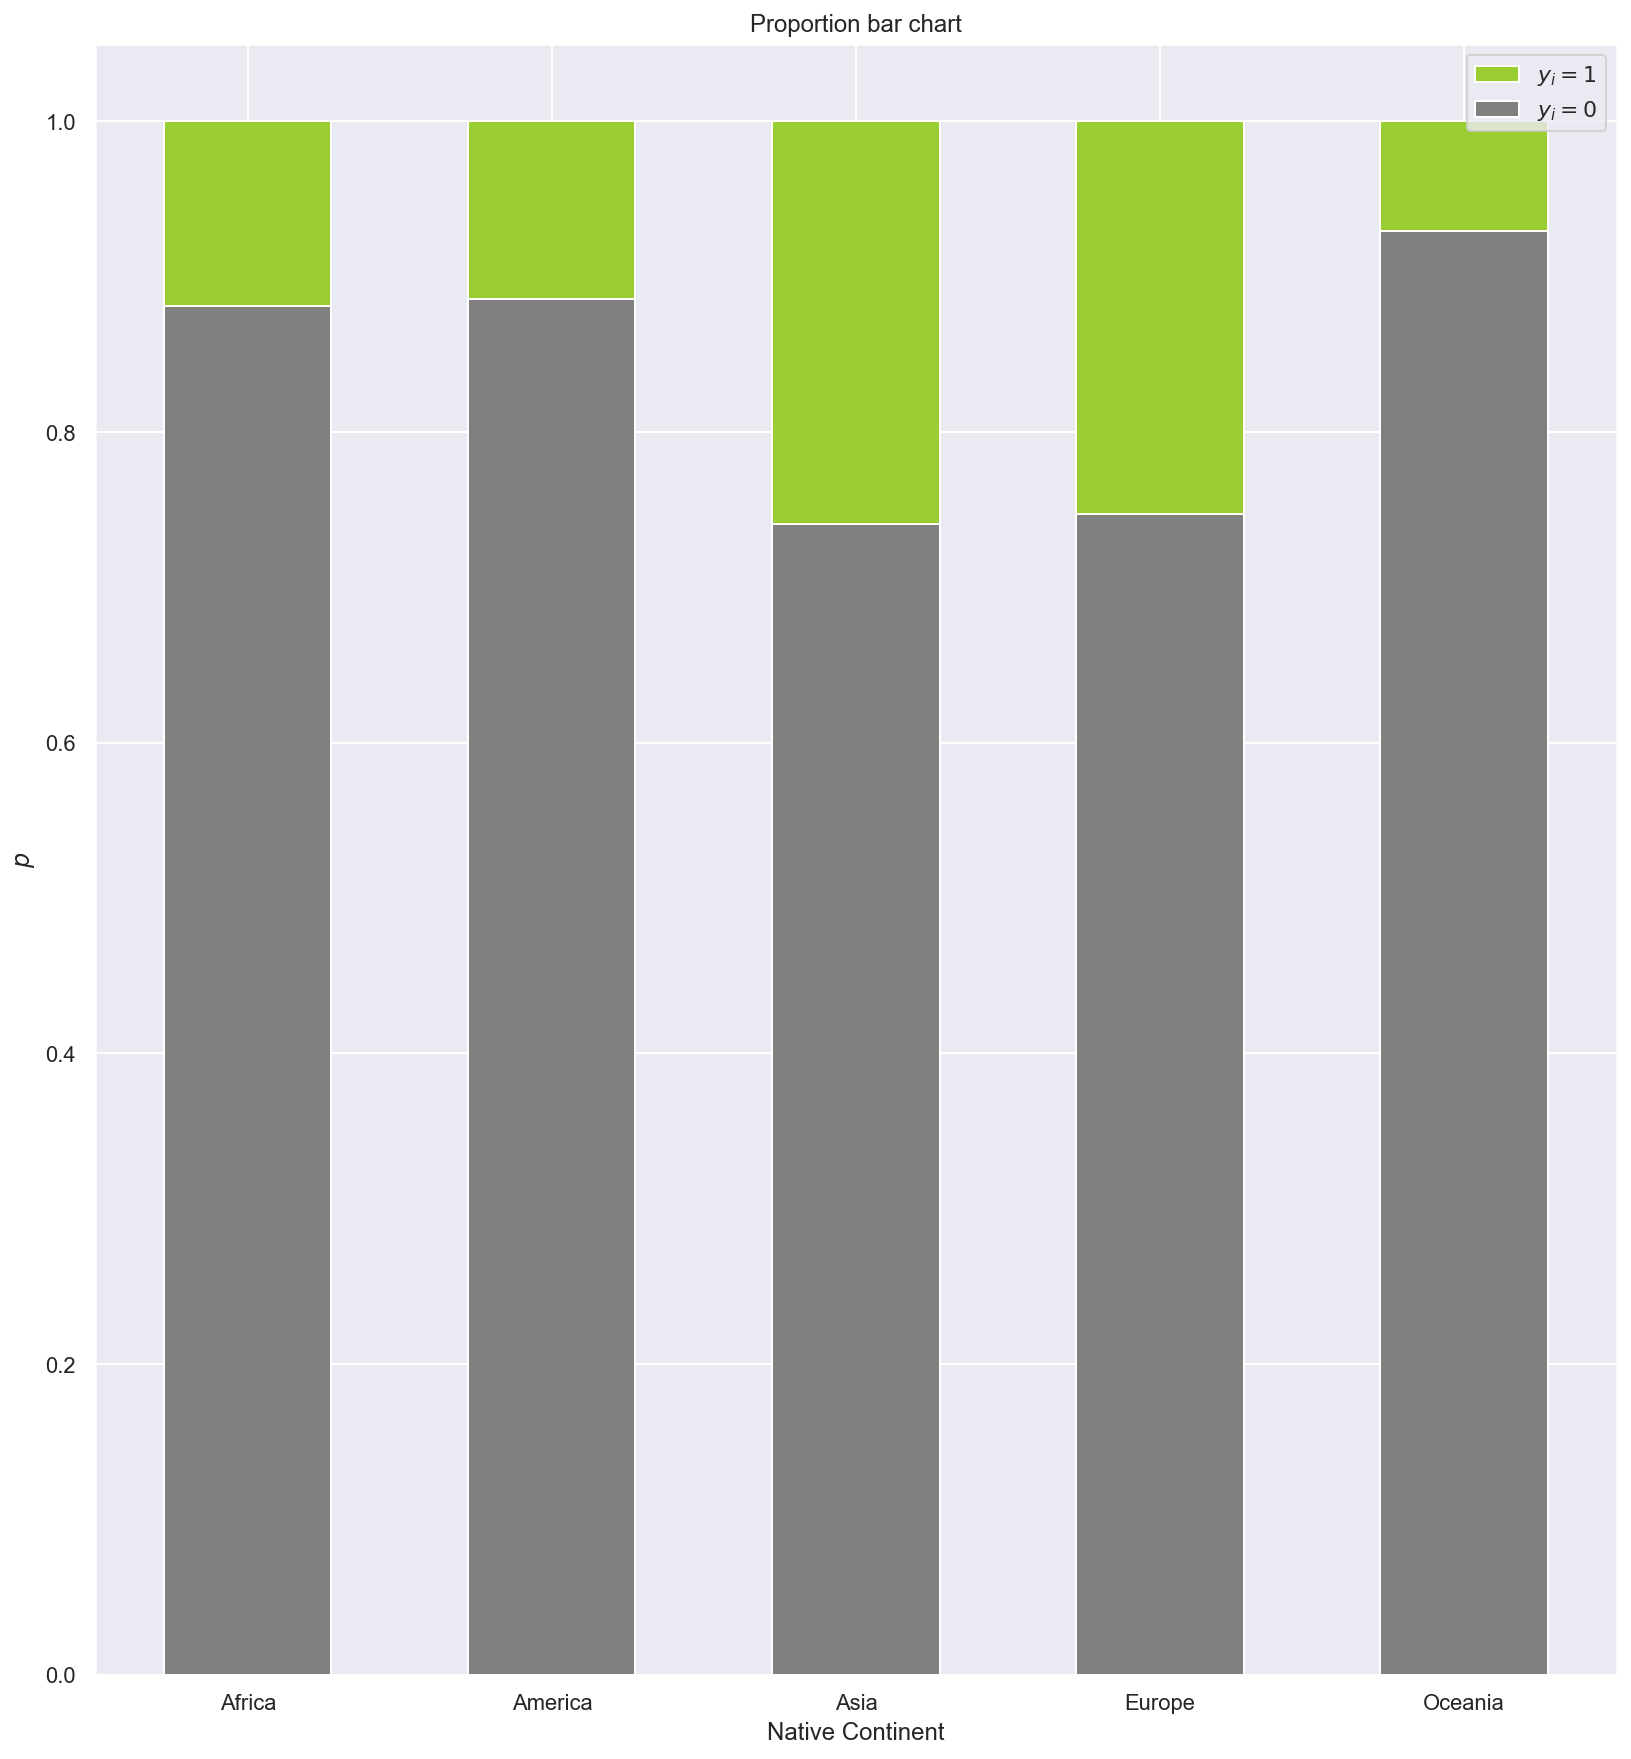

In [38]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Income")

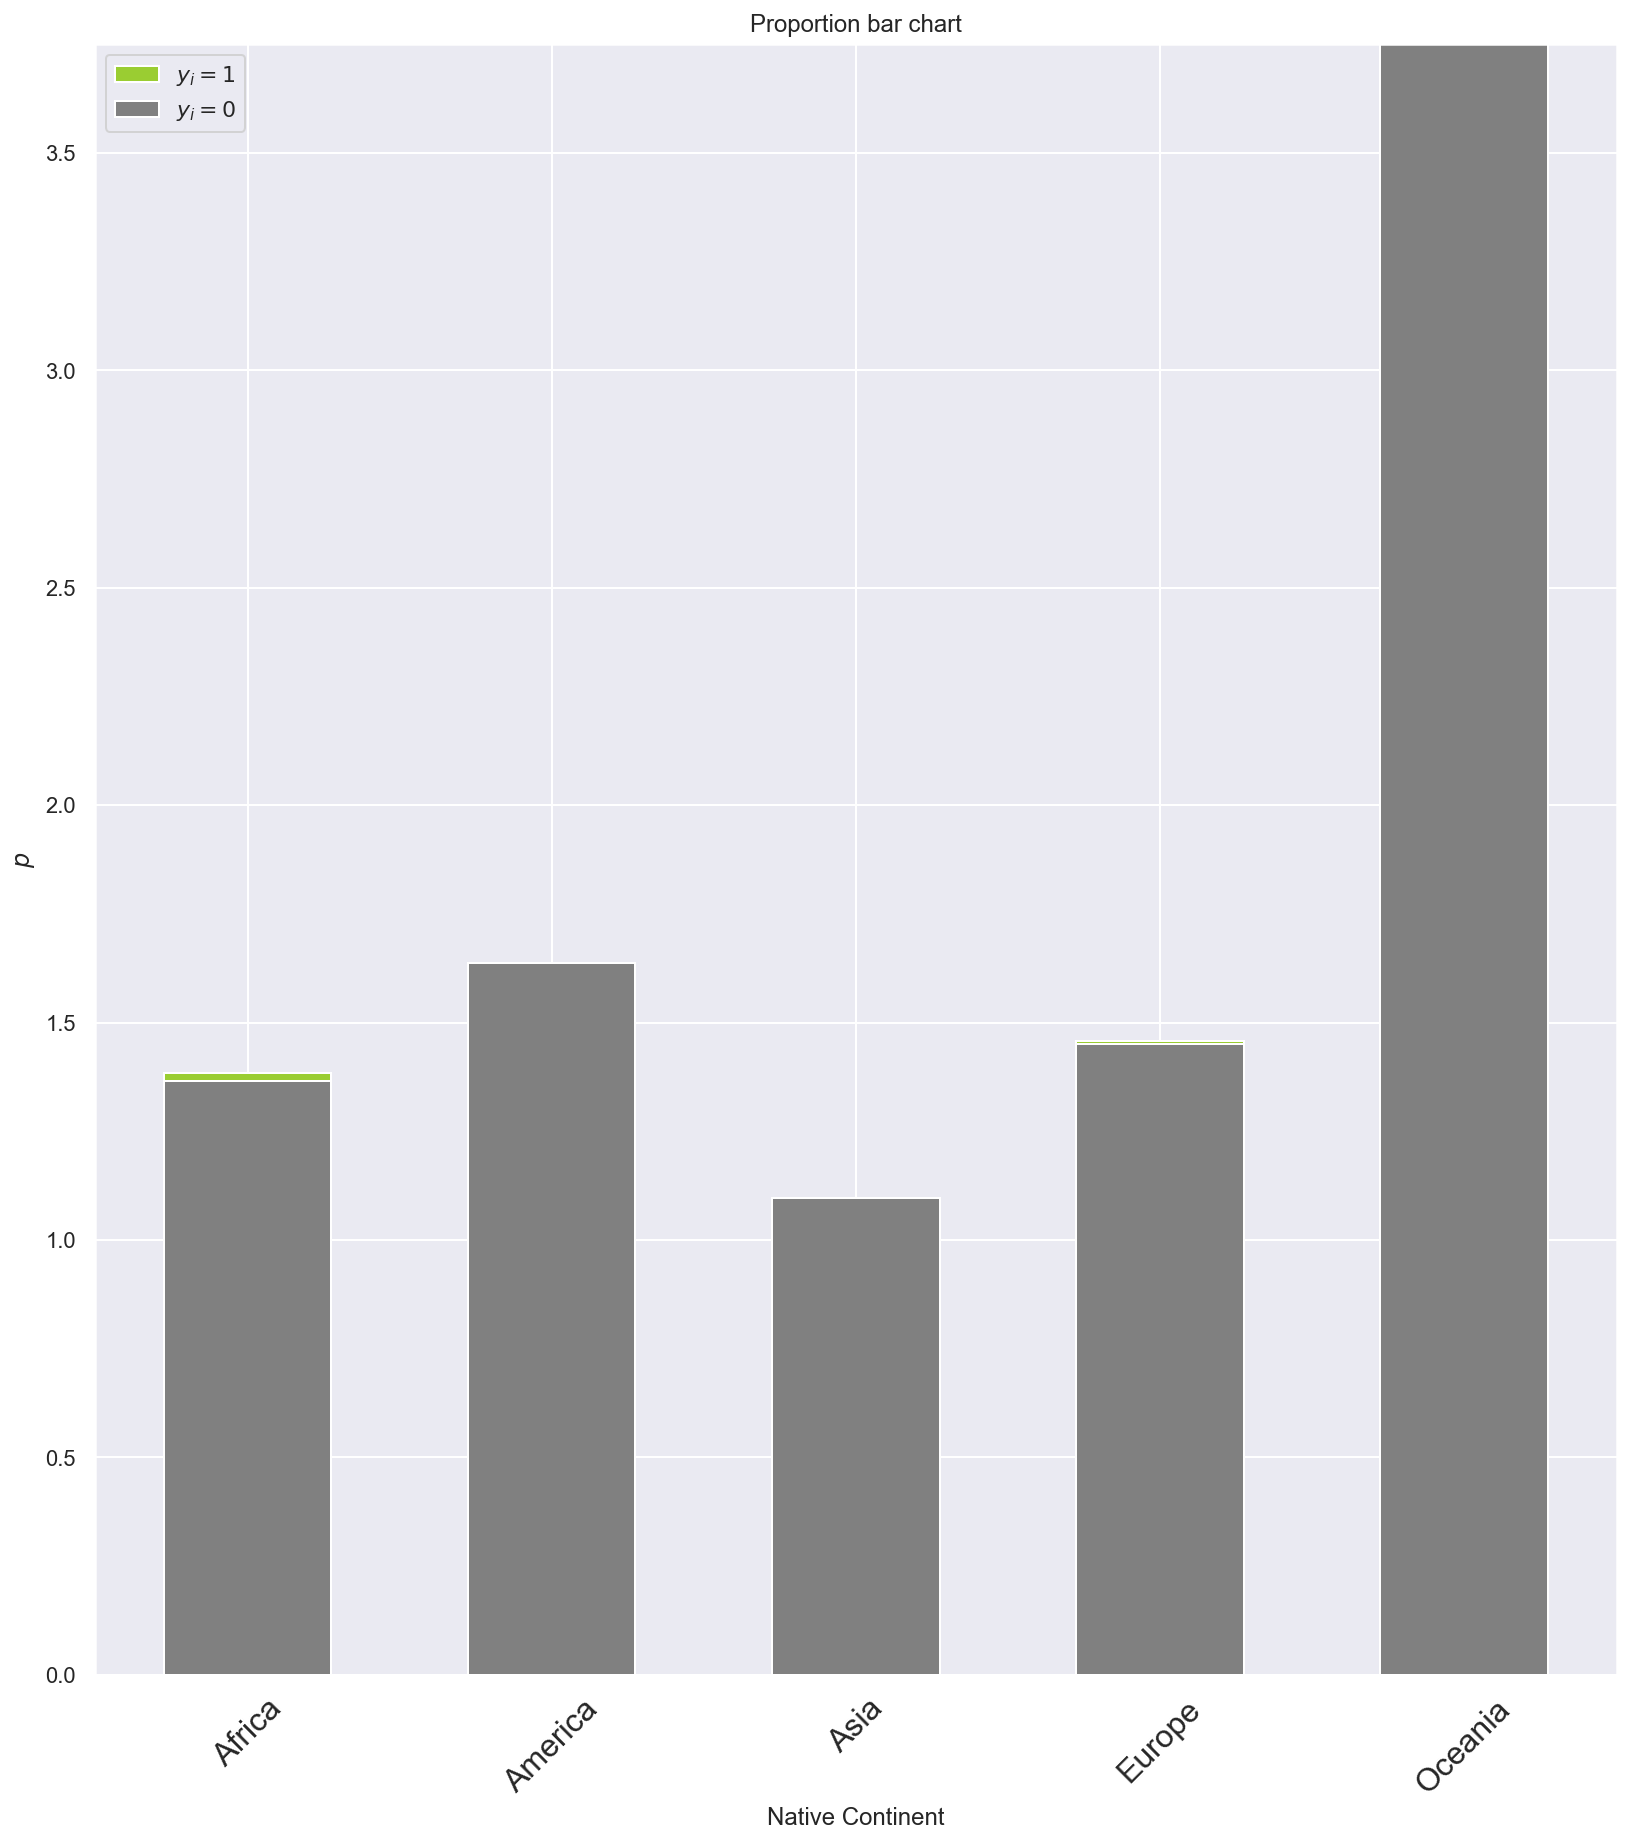

In [39]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=16, rotation=45)

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Employment Sector")

In [72]:
#all the categorical variables 
newland_train

,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Income,Age,Group
CITIZEN_ID,,,,,,,,,,,,
12486,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,1,43,C
12487,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,1,40,A
12488,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,1,37,C
12489,Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,1,61,B
12490,Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,1,31,A
...,...,...,...,...,...,...,...,...,...,...,...,...
34881,Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,23,A
34882,Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,21,A
34883,Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,0,24,B


In [78]:
metric_features = newland_train[['Years of Education', 'Working Hours per week', 'Age', 'Income']]
non_metric_features = newland_train.drop(metric_features,axis=1)


In [97]:
#We are going to encode education level

from sklearn.preprocessing import OrdinalEncoder
#enc1 = OrdinalEncoder(categories={0:"Preschool",1:"Primary School",2:"Middle School - 1st Cycle";3:"Middle School - 2nd Cycle",4:"Middle School Complete", 5:"High School - 1st Cycle", 6:"High School - 2nd Cycle",7:"High School Complete", 8:"High School + PostGraduation", 9: "Professional School", 10:"Professional School + PostGraduation",11:"Bachelors",12:"Bachelors + PostGraduation",13:"Masters",14:"Masters + PostGraduation",15:"Phd"})
enc = OrdinalEncoder()
x=[["Preschool",0], ["Primary School",1],["Mi[ddle School - 1st Cycle",2],["Middle School - 2nd Cycle",3],["Middle School Complete",4],["High School - 1st Cycle",5],["High School - 2nd Cycle",6],["High School Complete",7],["High School + PostGraduation",8],["Professional School",9],["Professional School + PostGraduation",10],["Bachelors",11],["Bachelors + PostGraduation",12],["Masters",13],["Masters + PostGraduation",14],["Phd",15]]
enc1.fit(x)




OrdinalEncoder()

In [101]:
non_metric_features["Education Level"]

CITIZEN_ID
12486    High School + PostGraduation
12487             Professional School
12488             Professional School
12489         High School - 2nd Cycle
12490                             PhD
                     ...             
34881             Professional School
34882             Professional School
34883                         Masters
34884      Bachelors + PostGraduation
34885    High School + PostGraduation
Name: Education Level, Length: 22400, dtype: object

In [98]:
education_encoded = pd.Series(enc1.transform(non_metric_features["Education Level"]))
education_encoded

ValueError: Expected 2D array, got 1D array instead:
array=['High School + PostGraduation' 'Professional School'
 'Professional School' ... 'Masters' 'Bachelors + PostGraduation'
 'High School + PostGraduation'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [89]:
education_encoded[["Education Level"]]

,Education Level
count,22400.000000
mean,7.149420
std,5.762037
min,0.000000
25%,2.000000
50%,6.000000
75%,14.000000
max,15.000000


In [88]:
education_encoded.iloc[12490]

Native Continent      3.0
Marital Status        1.0
Lives with            5.0
Base Area            29.0
Education Level       2.0
Employment Sector     3.0
Role                 12.0
Group                 0.0
Name: 12490, dtype: float64

In [42]:
from itertools import product
from pandas_profiling import ProfileReport

In [43]:
profile = ProfileReport(
newland_train,
title='Newland_Profiling',
correlations={
"pearson": {"calculate": True},
"spearman": {"calculate": False},
"kendall": {"calculate": False},
"phi_k": {"calculate": False},
"cramers": {"calculate": False},
},
)

TypeError: describe_boolean_1d() got an unexpected keyword argument 'title'

In [ ]:
profile.to_notebook_iframe()

In [ ]:
#from sklearn import preprocessing
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Age Histogram
plt.hist(newland_train["Age"], bins=10)  # mess around with the bins
plt.title("Age", y=-0.2)

plt.show()

In [ ]:
# Income Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Income"], bins=10)  # mess around with the bins
plt.title("Income", y=-0.2)

plt.show()

In [ ]:
# Working hours per Week Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Working Hours per week"], bins=10)  # mess around with the bins
plt.title("Working Hours per week", y=-0.2)

plt.show()

In [ ]:
# Years of Education Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Years of Education"], bins=10)  # mess around with the bins
plt.title("Years of Education", y=-0.2)

plt.show()

In [ ]:
# Age Variable Box Plot
sns.boxplot(y=newland_train["Age"])

plt.show()

In [ ]:
# Working Hours per week Variable Box Plot
sns.boxplot(y=newland_train["Working Hours per week"])

plt.show()

In [ ]:
# Years of Education Variable Box Plot
sns.boxplot(y=newland_train["Years of Education"])

plt.show()

In [ ]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(newland_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [ ]:
# Single Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
sns.countplot(x=newland_train["Native Continent"])

plt.show()

In [ ]:
# Marital Status Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Marital Status"], order = newland_train["Marital Status"].value_counts().index)

plt.show()

In [ ]:
# Lives with Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Lives with"], order = newland_train["Lives with"].value_counts().index)

plt.show()

In [ ]:
# Base Area Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(20,20))
sns.countplot(x=newland_train["Base Area"],order = newland_train["Base Area"].value_counts().index )
plt.show()

In [ ]:
# Education Level Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Education Level"], order = newland_train["Education Level"].value_counts().index)

plt.show()

In [ ]:
# Employment Sector Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Employment Sector"], order = newland_train["Employment Sector"].value_counts().index)
plt.show()

In [ ]:
# Role Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Role"],order = newland_train["Role"].value_counts().index)
plt.show()

In [ ]:
# Group Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(10,10))
sns.countplot(x=newland_train["Group"], order = newland_train["Group"].value_counts().index)
plt.show()

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "names", y = "values", ax=ax, data=df)
['Native Continent', 'Marital Status', 'Lives with', 'Base Area', 'Education Level', 'Employment Sector', 'Role', 'Group']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc1 = OrdinalEncoder()


In [ ]:
newland_train[non_metric_features]

In [ ]:
newland_train_enc = pd.DataFrame(enc1.transform(newland_train[non_metric_features]), columns = newland_train[non_metric_features].columns)
newland_train_enc 